In [1]:
import pandas as pd

# Load filtered datasets
business_df = pd.read_csv("filtered_business_data.csv")
reviews_df = pd.read_csv("filtered_reviews_data.csv")  

/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print(business_df.shape)
print(reviews_df.shape)

(47424, 14)
(1817429, 12)


In [3]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install textblob


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

analyzer = SentimentIntensityAnalyzer()


In [6]:
# VADER sentiment score (compound)
reviews_df['vader_sentiment'] = reviews_df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [7]:
# TextBlob polarity
reviews_df['textblob_polarity'] = reviews_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [9]:
print(reviews_df[['stars', 'vader_sentiment', 'textblob_polarity']].head())

   stars  vader_sentiment  textblob_polarity
0      3           0.9201           0.139935
1      2          -0.2447           0.218056
2      5           0.8439           0.512500
3      5           0.9402           0.176720
4      3           0.9881           0.173188


In [10]:
city_summary = reviews_df.groupby('city').agg({
    'stars': 'mean',
    'vader_sentiment': 'mean',
    'textblob_polarity': 'mean'
}).reset_index()

print(city_summary)

           city     stars  vader_sentiment  textblob_polarity
0  indianapolis  3.859450         0.705068           0.256323
1     nashville  3.866086         0.702697           0.262723
2  philadelphia  3.811737         0.703898           0.249916
3         tampa  3.843747         0.688421           0.267158
4        tucson  3.735965         0.660626           0.254267


In [11]:
# Correlation between sentiment and stars per city
correlation_data = []

for city in reviews_df['city'].unique():
    city_data = reviews_df[reviews_df['city'] == city]
    vader_corr = city_data['vader_sentiment'].corr(city_data['stars'])
    blob_corr = city_data['textblob_polarity'].corr(city_data['stars'])
    correlation_data.append((city, vader_corr, blob_corr))

correlation_df = pd.DataFrame(correlation_data, columns=['City', 'VADER_Correlation', 'TextBlob_Correlation'])
print(correlation_df)

           City  VADER_Correlation  TextBlob_Correlation
0        tucson           0.643586              0.641675
1  philadelphia           0.599116              0.588541
2  indianapolis           0.639842              0.612091
3         tampa           0.653086              0.639676
4     nashville           0.624263              0.608887


NameError: name 'plt' is not defined

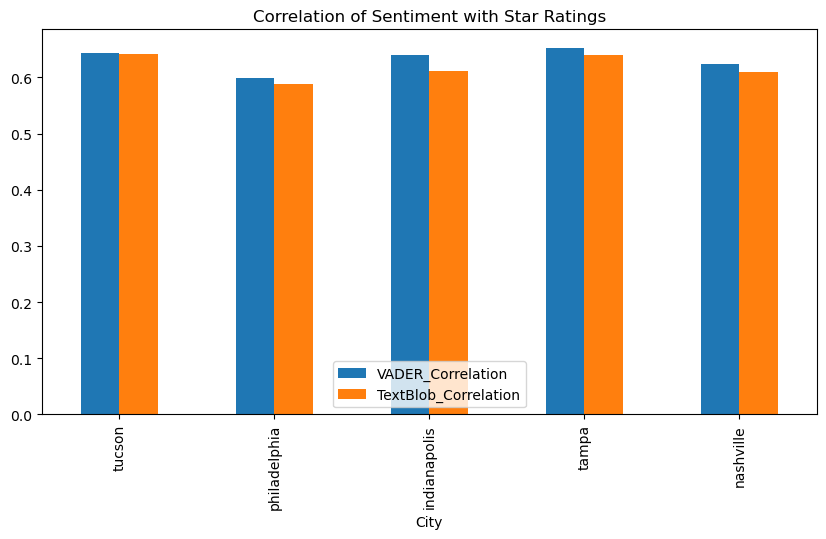

In [12]:
correlation_df.set_index('City').plot(kind='bar', figsize=(10,5), title='Correlation of Sentiment with Star Ratings')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(city_summary['city'], city_summary['stars'], label='Avg Stars', marker='o')
plt.plot(city_summary['city'], city_summary['vader_sentiment'], label='VADER Sentiment', marker='o')
plt.plot(city_summary['city'], city_summary['textblob_polarity'], label='TextBlob Sentiment', marker='o')
plt.xticks(rotation=45)
plt.ylabel('Scores')
plt.title('Average Sentiment Scores vs Star Ratings per City')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
vader_corr = reviews_df['vader_sentiment'].corr(reviews_df['stars'])
textblob_corr = reviews_df['textblob_polarity'].corr(reviews_df['stars'])

print(f"Correlation (VADER vs Stars): {vader_corr:.2f}")
print(f"Correlation (TextBlob vs Stars): {textblob_corr:.2f}")


Correlation (VADER vs Stars): 0.63
Correlation (TextBlob vs Stars): 0.61


In [14]:
sentiment_by_city = reviews_df.groupby('city')[['stars', 'vader_sentiment', 'textblob_polarity']].mean().reset_index()
print(sentiment_by_city)

           city     stars  vader_sentiment  textblob_polarity
0  indianapolis  3.859450         0.705068           0.256323
1     nashville  3.866086         0.702697           0.262723
2  philadelphia  3.811737         0.703898           0.249916
3         tampa  3.843747         0.688421           0.267158
4        tucson  3.735965         0.660626           0.254267


In [15]:
correlation_df['Better_Model'] = correlation_df.apply(
    lambda row: 'VADER' if row['VADER_Correlation'] > row['TextBlob_Correlation'] else 'TextBlob', axis=1
)
print(correlation_df)

           City  VADER_Correlation  TextBlob_Correlation Better_Model
0        tucson           0.643586              0.641675        VADER
1  philadelphia           0.599116              0.588541        VADER
2  indianapolis           0.639842              0.612091        VADER
3         tampa           0.653086              0.639676        VADER
4     nashville           0.624263              0.608887        VADER


In [16]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,tucson,AZ,85711.0,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
2,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,nashville,TN,37207.0,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
3,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
4,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."


In [17]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,review_length,year,vader_sentiment,textblob_polarity
0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,tucson,339,2014,0.9201,0.139935
1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2,1,0,0,Let me start by saying the service is AWESOME!...,2015-09-10 02:41:13,tucson,428,2015,-0.2447,0.218056
2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5,0,0,0,Went here for the first time for the dinner bu...,2017-08-18 01:42:46,tucson,158,2017,0.8439,0.512500
3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5,0,0,0,This is my 1st experience here at Kettle. The...,2015-09-26 16:13:09,tucson,439,2015,0.9402,0.176720
4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3,3,0,0,"Located on the west side of Starr Pass Blvd, K...",2015-06-22 16:08:27,tucson,1068,2015,0.9881,0.173188


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/sarthak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarthak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sarthak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sarthak/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Basic preprocessing for topic modeling
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return filtered_tokens

# Sample 10,000 reviews for quick modeling
sample_reviews = reviews_df['text'].sample(10000, random_state=42).tolist()
processed_reviews = [preprocess_text(review) for review in sample_reviews]

In [20]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_reviews)
corpus = [dictionary.doc2bow(text) for text in processed_reviews]

In [21]:
# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Display topics
print("\nTop 5 Topics from LDA Model:")
for idx, topic in lda_model.print_topics(num_words=8):
    print(f"Topic {idx+1}: {topic}")


Top 5 Topics from LDA Model:
Topic 1: 0.012*"good" + 0.011*"chicken" + 0.009*"ordered" + 0.008*"sauce" + 0.007*"like" + 0.007*"cheese" + 0.007*"also" + 0.007*"salad"
Topic 2: 0.016*"food" + 0.012*"time" + 0.012*"u" + 0.010*"order" + 0.009*"table" + 0.009*"would" + 0.008*"get" + 0.008*"service"
Topic 3: 0.026*"food" + 0.023*"great" + 0.022*"place" + 0.017*"good" + 0.011*"service" + 0.008*"love" + 0.008*"time" + 0.008*"go"
Topic 4: 0.043*"taco" + 0.012*"salsa" + 0.011*"bar" + 0.010*"margarita" + 0.010*"chip" + 0.008*"music" + 0.006*"game" + 0.005*"tortilla"
Topic 5: 0.020*"sandwich" + 0.013*"beer" + 0.010*"place" + 0.009*"philly" + 0.009*"cheese" + 0.006*"get" + 0.006*"steak" + 0.006*"meat"


In [22]:
!pip install pyLDAvis wordcloud

In [23]:
import pyLDAvis.gensim_models
import pyLDAvis
from wordcloud import WordCloud
import os

# Create output directory
if not os.path.exists("topic_visuals"):
    os.makedirs("topic_visuals")

# Function to run LDA and generate pyLDAvis + WordClouds
def topic_modeling_by_group(group_name, df_subset, num_topics=5):
    print(f"\n--- Topic Modeling for {group_name} ---")
    processed_texts = [preprocess_text(text) for text in df_subset['text'].dropna().sample(5000, random_state=42)]
    dictionary = corpora.Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

    # Print top topics
    for idx, topic in lda_model.print_topics(num_words=8):
        print(f"Topic {idx+1}: {topic}")

    # Save pyLDAvis HTML
    vis = pyLDAvis.gensim_models.prepare(
    lda_model, corpus, dictionary,
    sort_topics=False,
    mds='pcoa',
    n_jobs=1  # <-- disable parallelization to avoid BrokenProcessPool error
)

    pyLDAvis.save_html(vis, f"topic_visuals/{group_name}_lda_vis.html")

    # Generate word clouds
    for i in range(num_topics):
        plt.figure()
        word_dict = dict(lda_model.show_topic(i, 25))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{group_name} - Topic {i+1}")
        plt.tight_layout()
        plt.savefig(f"topic_visuals/{group_name}_topic_{i+1}_wordcloud.png")
        plt.close()



In [24]:
# Per-city topic modeling
for city in reviews_df['city'].unique():
    city_reviews = reviews_df[reviews_df['city'] == city]
    topic_modeling_by_group(city, city_reviews)
import warnings
warnings.filterwarnings('ignore')



--- Topic Modeling for tucson ---
Topic 1: 0.017*"good" + 0.013*"place" + 0.012*"chicken" + 0.011*"like" + 0.010*"food" + 0.010*"pizza" + 0.010*"sauce" + 0.008*"salad"
Topic 2: 0.016*"place" + 0.014*"food" + 0.014*"good" + 0.010*"time" + 0.009*"one" + 0.009*"taco" + 0.008*"always" + 0.008*"like"
Topic 3: 0.013*"food" + 0.011*"order" + 0.011*"time" + 0.010*"u" + 0.009*"service" + 0.009*"one" + 0.008*"would" + 0.008*"get"
Topic 4: 0.026*"great" + 0.021*"food" + 0.017*"good" + 0.014*"service" + 0.011*"place" + 0.011*"delicious" + 0.007*"friendly" + 0.007*"nice"
Topic 5: 0.012*"time" + 0.009*"food" + 0.008*"back" + 0.008*"try" + 0.007*"breakfast" + 0.007*"egg" + 0.006*"restaurant" + 0.006*"got"


/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N


--- Topic Modeling for philadelphia ---
Topic 1: 0.012*"food" + 0.012*"time" + 0.010*"u" + 0.009*"place" + 0.008*"table" + 0.008*"would" + 0.008*"order" + 0.007*"like"
Topic 2: 0.022*"place" + 0.019*"food" + 0.018*"good" + 0.014*"great" + 0.009*"pizza" + 0.008*"go" + 0.007*"always" + 0.007*"like"
Topic 3: 0.007*"wing" + 0.006*"burger" + 0.004*"beer" + 0.004*"truck" + 0.004*"guy" + 0.004*"tot" + 0.003*"like" + 0.003*"tater"
Topic 4: 0.010*"cheese" + 0.009*"good" + 0.009*"philly" + 0.009*"cheesesteak" + 0.008*"meat" + 0.008*"steak" + 0.008*"like" + 0.007*"one"
Topic 5: 0.013*"food" + 0.012*"good" + 0.012*"great" + 0.010*"place" + 0.007*"delicious" + 0.007*"also" + 0.007*"really" + 0.006*"chicken"


/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N

/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.


--- Topic Modeling for indianapolis ---
Topic 1: 0.047*"pizza" + 0.018*"sushi" + 0.012*"roll" + 0.011*"taco" + 0.008*"place" + 0.007*"good" + 0.007*"crust" + 0.005*"fresh"
Topic 2: 0.015*"food" + 0.013*"time" + 0.011*"order" + 0.010*"u" + 0.008*"table" + 0.008*"get" + 0.008*"one" + 0.008*"service"
Topic 3: 0.014*"good" + 0.010*"chicken" + 0.008*"cheese" + 0.008*"great" + 0.008*"food" + 0.007*"like" + 0.007*"sauce" + 0.007*"ordered"
Topic 4: 0.025*"place" + 0.025*"food" + 0.022*"great" + 0.015*"good" + 0.012*"always" + 0.011*"service" + 0.009*"love" + 0.008*"go"
Topic 5: 0.012*"coffee" + 0.010*"great" + 0.009*"beer" + 0.007*"place" + 0.006*"also" + 0.006*"sandwich" + 0.006*"good" + 0.005*"parking"


/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/sarthak/opt/a

/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.


--- Topic Modeling for tampa ---
Topic 1: 0.016*"food" + 0.010*"good" + 0.010*"restaurant" + 0.008*"like" + 0.008*"chicken" + 0.007*"dish" + 0.007*"sauce" + 0.007*"place"
Topic 2: 0.015*"good" + 0.009*"place" + 0.008*"like" + 0.007*"taco" + 0.007*"cheese" + 0.007*"ordered" + 0.006*"food" + 0.006*"also"
Topic 3: 0.031*"great" + 0.029*"food" + 0.023*"place" + 0.017*"service" + 0.015*"good" + 0.010*"love" + 0.010*"delicious" + 0.010*"amazing"
Topic 4: 0.013*"food" + 0.012*"time" + 0.011*"order" + 0.010*"u" + 0.009*"one" + 0.008*"get" + 0.007*"would" + 0.007*"back"
Topic 5: 0.031*"sushi" + 0.021*"roll" + 0.008*"place" + 0.008*"tea" + 0.005*"nice" + 0.005*"like" + 0.005*"good" + 0.005*"bar"


/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientat


--- Topic Modeling for nashville ---
Topic 1: 0.018*"food" + 0.013*"place" + 0.010*"time" + 0.009*"get" + 0.009*"order" + 0.008*"would" + 0.008*"back" + 0.007*"service"
Topic 2: 0.015*"u" + 0.009*"restaurant" + 0.009*"table" + 0.008*"food" + 0.008*"dinner" + 0.008*"meal" + 0.007*"service" + 0.007*"night"
Topic 3: 0.015*"pizza" + 0.011*"like" + 0.008*"burger" + 0.007*"good" + 0.007*"time" + 0.006*"ordered" + 0.006*"got" + 0.006*"one"
Topic 4: 0.018*"good" + 0.017*"food" + 0.017*"great" + 0.017*"place" + 0.013*"chicken" + 0.011*"nashville" + 0.008*"delicious" + 0.007*"best"
Topic 5: 0.009*"coffee" + 0.009*"hotel" + 0.007*"egg" + 0.007*"one" + 0.005*"delicious" + 0.005*"room" + 0.005*"ever" + 0.004*"house"


/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/sarthak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

In [25]:
import pandas as pd

def extract_topic_summary(lda_model, group_name, num_words=8):
    summary_data = []
    for i, topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        keywords = ", ".join([word for word, _ in topic])
        summary_data.append({
            "Group": group_name,
            "Topic #": i + 1,
            "Top Words": keywords,
            "Theme Interpretation": ""  # You can manually edit later
        })
    return pd.DataFrame(summary_data)


In [26]:
# Per-star-level topic modeling
for rating in [1, 3, 5]:
    rating_reviews = reviews_df[reviews_df['stars'] == rating]
    topic_modeling_by_group(f"{rating}_Stars", rating_reviews)



--- Topic Modeling for 1_Stars ---
Topic 1: 0.020*"place" + 0.019*"pizza" + 0.019*"food" + 0.015*"service" + 0.011*"good" + 0.010*"time" + 0.009*"like" + 0.008*"go"
Topic 2: 0.009*"room" + 0.008*"like" + 0.006*"burger" + 0.006*"hotel" + 0.006*"door" + 0.005*"bathroom" + 0.005*"dog" + 0.004*"guy"
Topic 3: 0.017*"food" + 0.012*"ordered" + 0.011*"like" + 0.010*"chicken" + 0.009*"place" + 0.007*"good" + 0.007*"cheese" + 0.006*"would"
Topic 4: 0.019*"food" + 0.015*"u" + 0.015*"minute" + 0.013*"table" + 0.012*"order" + 0.012*"time" + 0.011*"one" + 0.011*"service"
Topic 5: 0.015*"order" + 0.012*"told" + 0.011*"said" + 0.010*"would" + 0.009*"customer" + 0.009*"time" + 0.009*"u" + 0.008*"asked"

--- Topic Modeling for 3_Stars ---
Topic 1: 0.017*"good" + 0.015*"food" + 0.010*"place" + 0.009*"chicken" + 0.009*"like" + 0.008*"restaurant" + 0.008*"would" + 0.007*"roll"
Topic 2: 0.019*"food" + 0.013*"time" + 0.010*"place" + 0.009*"get" + 0.009*"service" + 0.009*"good" + 0.009*"one" + 0.008*"order"


In [31]:
# After lda_model is created
topic_df = extract_topic_summary(lda_model, group_name)
topic_df.to_csv(f"topic_visuals/{group_name}_topic_summary.csv", index=False)
print(topic_df)


NameError: name 'Tucson' is not defined

In [32]:
# Step 6: Precompute average sentiment per business
sentiment_avg = reviews_df.groupby('business_id')['vader_sentiment'].mean().to_dict()

In [36]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pickle

# Step 1: Prepare data for collaborative filtering using Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(reviews_df[['user_id', 'business_id', 'stars']], reader)

# Step 2: Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Train SVD model
svd = SVD(n_factors=100, biased=True, verbose=True)
svd.fit(trainset)

# Step 4: Evaluate model
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse:.4f}")



Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 1.2171
Model RMSE: 1.2171


In [37]:
# Step 5: Save model
with open("svd_model.pkl", "wb") as f:
    pickle.dump(svd, f)

# Step 6: Precompute average sentiment per business
sentiment_avg = reviews_df.groupby('business_id')['vader_sentiment'].mean().to_dict()


In [39]:
# Step 7: Enhanced recommendation function
def recommend_for_user(user_id, top_n=5, city=None):
    user_reviews = reviews_df[reviews_df['user_id'] == user_id]
    reviewed = set(user_reviews['business_id'])

    # Filter candidate businesses
    candidate_df = business_df[~business_df['business_id'].isin(reviewed)]
    if city:
        candidate_df = candidate_df[candidate_df['city'].str.lower() == city.lower()]

    # Predict and rank
    recommendations = []
    for _, row in candidate_df.iterrows():
        bid = row['business_id']
        name = row['name']
        pred_rating = svd.predict(user_id, bid).est
        sentiment = sentiment_avg.get(bid, 0.0)
        final_score = 0.6 * pred_rating + 0.4 * sentiment  # Weighted combination
        recommendations.append((name, pred_rating, sentiment, final_score))

    top_recs = sorted(recommendations, key=lambda x: x[3], reverse=True)[:top_n]

    print(f"\nTop {top_n} Recommendations for User {user_id}{' in ' + city if city else ''}:")
    for name, rating, sentiment, score in top_recs:
        print(f"{name} | Predicted Rating: {rating:.2f} | Sentiment: {sentiment:.2f} | Final Score: {score:.2f}")

# Example usage
example_user = reviews_df['user_id'].iloc[0]
recommend_for_user(example_user, top_n=5, city='Tucson')



Top 5 Recommendations for User 8g_iMtfSiwikVnbP2etR0A in Tucson:
Buendia Breakfast & Lunch Cafe | Predicted Rating: 5.00 | Sentiment: 0.94 | Final Score: 3.38
Juice Envy | Predicted Rating: 5.00 | Sentiment: 0.93 | Final Score: 3.37
Greek Eatz | Predicted Rating: 5.00 | Sentiment: 0.93 | Final Score: 3.37
Zeal Patisserie | Predicted Rating: 5.00 | Sentiment: 0.93 | Final Score: 3.37
Lemongrass | Predicted Rating: 5.00 | Sentiment: 0.93 | Final Score: 3.37


In [41]:
def hybrid_recommend_for_user(user_id, business_df, reviews_df, model, top_n=5, city=None, category_filter=None):
    # Get all business_ids the user has already reviewed
    user_reviewed = reviews_df[reviews_df['user_id'] == user_id]['business_id'].unique()

    # Filter businesses: exclude already reviewed
    candidates = business_df[~business_df['business_id'].isin(user_reviewed)]

    # Filter by city if provided
    if city:
        candidates = candidates[candidates['city'].str.lower() == city.lower()]

    # Filter by category if provided
    if category_filter:
        candidates = candidates[candidates['categories'].str.contains(category_filter, case=False, na=False)]

    # Compute average sentiment per business
    sentiment_avg = reviews_df.groupby('business_id')['vader_sentiment'].mean().to_dict()

    recommendations = []

    for _, row in candidates.iterrows():
        business_id = row['business_id']
        name = row['name']
        try:
            pred = model.predict(user_id, business_id)
            predicted_rating = pred.est
            sentiment_score = sentiment_avg.get(business_id, 0)  # default if no sentiment
            final_score = 0.6 * predicted_rating + 0.4 * sentiment_score
            recommendations.append((name, predicted_rating, sentiment_score, final_score))
        except:
            continue

    # Sort by final score
    sorted_recs = sorted(recommendations, key=lambda x: x[3], reverse=True)[:top_n]

    print(f"\nTop {top_n} Recommendations for User {user_id}" + (f" in {city}" if city else "") + (f" (Category: {category_filter})" if category_filter else "") + ":")
    for name, rating, sentiment, final_score in sorted_recs:
        print(f"{name} | Predicted: {rating:.2f} | Sentiment: {sentiment:.2f} | Final Score: {final_score:.2f}")


In [43]:
from surprise import SVD

model = SVD()
model.fit(trainset)


In [44]:
hybrid_recommend_for_user(
    user_id='8g_iMtfSiwikVnbP2etR0A',
    business_df=business_df,
    reviews_df=reviews_df,
    model=model,  # use the actual variable name
    top_n=5,
    city='Tucson',
    category_filter='Coffee & Tea'
)



Top 5 Recommendations for User 8g_iMtfSiwikVnbP2etR0A in Tucson (Category: Coffee & Tea):
Café Aqui | Predicted: 5.00 | Sentiment: 0.94 | Final Score: 3.37
Dogs-N-Donuts | Predicted: 5.00 | Sentiment: 0.92 | Final Score: 3.37
Prest Coffee Drive Thru | Predicted: 5.00 | Sentiment: 0.90 | Final Score: 3.36
Woops! Bakeshop Main Gate Square | Predicted: 4.99 | Sentiment: 0.90 | Final Score: 3.35
Barista Del Barrio | Predicted: 5.00 | Sentiment: 0.86 | Final Score: 3.35


In [45]:
def hybrid_recommend_for_user(user_id, business_df, reviews_df, model, top_n=5, city=None, category_filter=None):
    user_reviewed = reviews_df[reviews_df['user_id'] == user_id]['business_id'].unique()
    candidates = business_df[~business_df['business_id'].isin(user_reviewed)]

    if city:
        candidates = candidates[candidates['city'].str.lower() == city.lower()]
    if category_filter:
        candidates = candidates[candidates['categories'].str.contains(category_filter, case=False, na=False)]

    sentiment_avg = reviews_df.groupby('business_id')['vader_sentiment'].mean().to_dict()
    recommendations = []

    for _, row in candidates.iterrows():
        business_id = row['business_id']
        name = row['name']
        try:
            pred = model.predict(user_id, business_id)
            predicted_rating = pred.est
            sentiment_score = sentiment_avg.get(business_id, 0)
            final_score = 0.6 * predicted_rating + 0.4 * sentiment_score
            recommendations.append({
                'Restaurant': name,
                'Predicted Rating': predicted_rating,
                'Sentiment Score': sentiment_score,
                'Final Score': final_score
            })
        except:
            continue

    rec_df = pd.DataFrame(recommendations).sort_values(by='Final Score', ascending=False).head(top_n)

    return rec_df.reset_index(drop=True)


,Restaurant,Predicted Rating,Sentiment Score,Final Score
0,Café Aqui,5.000000,0.936455,3.374582
1,Dogs-N-Donuts,5.000000,0.923947,3.369579
2,Prest Coffee Drive Thru,5.000000,0.901823,3.360729
3,Woops! Bakeshop Main Gate Square,4.989041,0.901623,3.354074
4,Barista Del Barrio,5.000000,0.863453,3.345381


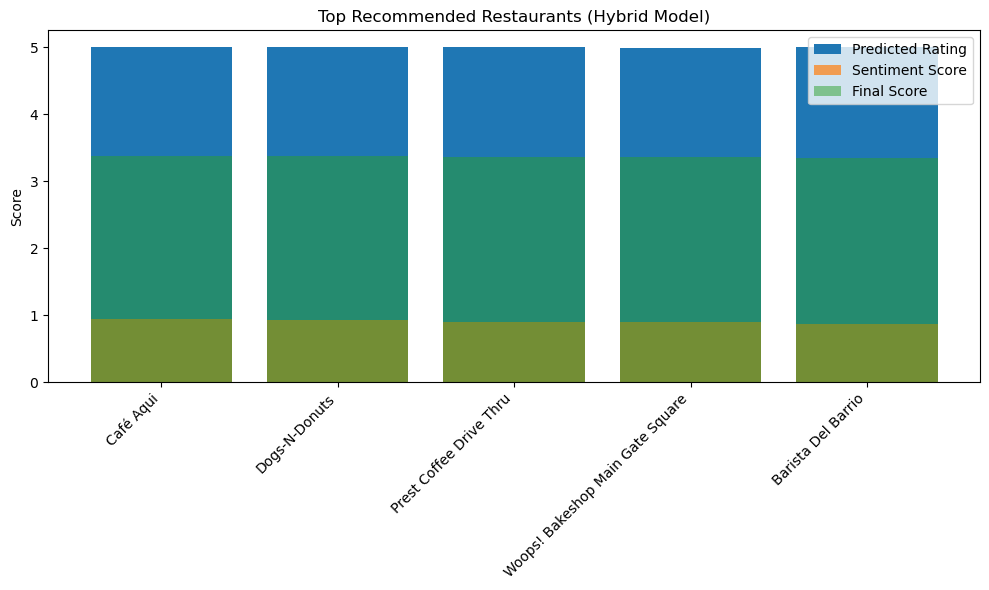

In [46]:
import matplotlib.pyplot as plt

# Get the recommendations
rec_df = hybrid_recommend_for_user(
    user_id='8g_iMtfSiwikVnbP2etR0A',
    business_df=business_df,
    reviews_df=reviews_df,
    model=model,
    top_n=5,
    city='Tucson',
    category_filter='Coffee & Tea'
)

# Display as table
display(rec_df)

# Plot
plt.figure(figsize=(10, 6))
x = rec_df['Restaurant']
plt.bar(x, rec_df['Predicted Rating'], label='Predicted Rating')
plt.bar(x, rec_df['Sentiment Score'], label='Sentiment Score', alpha=0.7)
plt.bar(x, rec_df['Final Score'], label='Final Score', alpha=0.5)
plt.title('Top Recommended Restaurants (Hybrid Model)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
